In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

df1 = pd.read_excel("datasets/Aracaju.xlsx")
df2 = pd.read_excel("datasets/Fortaleza.xlsx")
df3 = pd.read_excel("datasets/Natal.xlsx")
df4 = pd.read_excel("datasets/Recife.xlsx")
df5 = pd.read_excel("datasets/Salvador.xlsx")

In [4]:
mov_por_cidade = pd.concat([df1,df2,df3,df4,df5])
mov_por_cidade.head(10)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
5,Aracaju,2018-01-01,156.20,1522,1
6,Aracaju,2018-01-01,35.50,1522,2
7,Aracaju,2019-01-01,172.22,1522,6
8,Aracaju,2019-01-01,12.16,1523,1
9,Aracaju,2019-01-01,149.36,1523,3


In [5]:
mov_por_cidade["LojaID"] = mov_por_cidade.astype("object")

In [6]:
mov_por_cidade.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [7]:
mov_por_cidade.dropna(how="all", inplace=True)

In [8]:
mov_por_cidade["Receita"] = mov_por_cidade["Vendas"].mul(mov_por_cidade["Qtde"])
mov_por_cidade.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,Aracaju,1,142.00
1,Aracaju,2018-01-01,14.21,Aracaju,6,85.26
2,Aracaju,2018-01-01,71.55,Aracaju,1,71.55
3,Aracaju,2018-01-01,3.01,Aracaju,7,21.07
4,Aracaju,2018-01-01,24.51,Aracaju,8,196.08


In [9]:
n_maiores = mov_por_cidade.nlargest(5,"Receita")
n_menores = mov_por_cidade.nsmallest(5,"Receita")

n_maiores

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,Natal,4,3544.0
51,Natal,2018-01-21,859.0,Natal,4,3436.0
55,Natal,2019-01-08,859.0,Natal,4,3436.0
30,Natal,2018-10-02,856.0,Natal,4,3424.0
41,Natal,2018-05-20,835.0,Natal,4,3340.0


In [10]:
mov_por_cidade["Ano_venda"], mov_por_cidade["Mes_venda"], mov_por_cidade["Dia_venda"] = ( mov_por_cidade["Data"].dt.year, mov_por_cidade["Data"].dt.month, mov_por_cidade["Data"].dt.day)
mov_por_cidade["Diferenca_dias"] = mov_por_cidade["Data"] - mov_por_cidade["Data"].min()
mov_por_cidade["Trimestre_venda"] = mov_por_cidade["Data"].dt.quarter
mov_por_cidade.sort_values("Trimestre_venda")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,Mes_venda,Dia_venda,Diferenca_dias,Trimestre_venda
0,Aracaju,2018-01-01,142.00,Aracaju,1,142.00,2018,1,1,0 days,1
77,Recife,2019-01-01,102.82,Recife,6,616.92,2019,1,1,365 days,1
78,Recife,2019-01-01,238.73,Recife,3,716.19,2019,1,1,365 days,1
79,Recife,2019-01-01,14.53,Recife,6,87.18,2019,1,1,365 days,1
80,Recife,2019-01-01,114.14,Recife,8,913.12,2019,1,1,365 days,1
...,...,...,...,...,...,...,...,...,...,...,...
58,Natal,2018-12-23,272.00,Natal,3,816.00,2018,12,23,356 days,4
30,Natal,2018-10-02,856.00,Natal,4,3424.00,2018,10,2,274 days,4
37,Natal,2018-10-03,726.00,Natal,2,1452.00,2018,10,3,275 days,4
1,Natal,2018-11-25,563.00,Natal,2,1126.00,2018,11,25,328 days,4


In [11]:
vendas_marco_19 = mov_por_cidade.loc[(mov_por_cidade["Data"].dt.year == 2019) & (mov_por_cidade["Data"].dt.month == 3)]

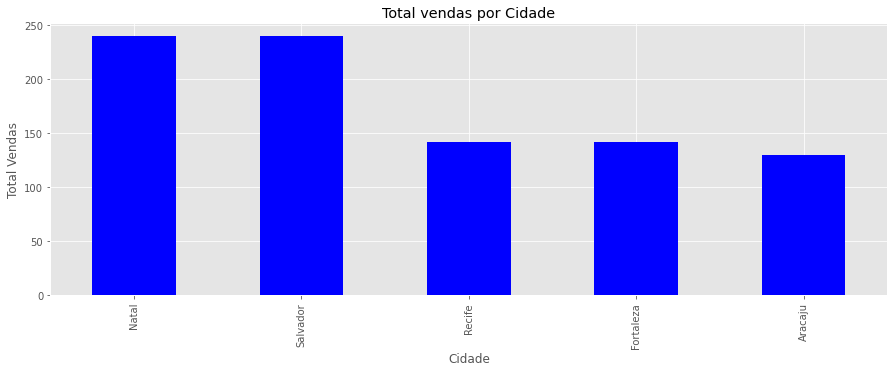

In [17]:
mov_por_cidade["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="blue", figsize=(15,5) )
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")
plt.savefig("Graficos/graficobar_TOTALVENDA_vs_MES.png")

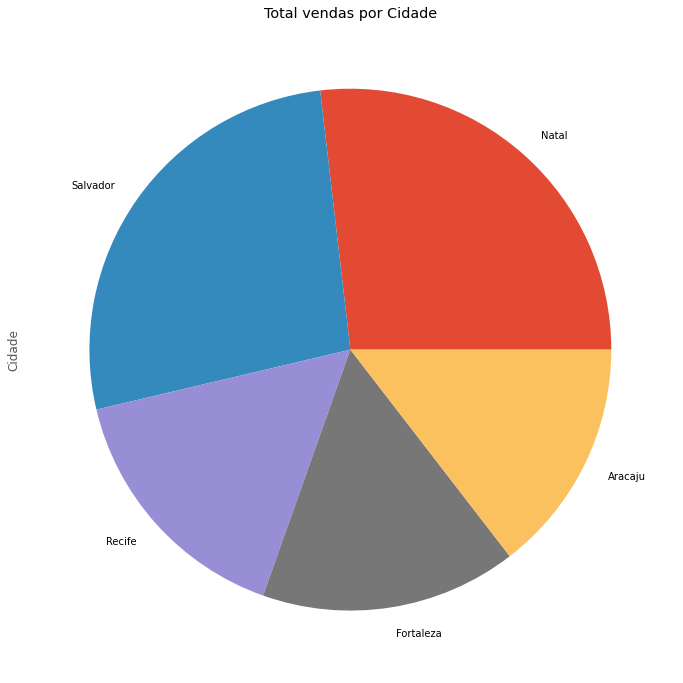

In [20]:

mov_por_cidade["Cidade"].value_counts().plot.pie(title="Total vendas por Cidade", figsize=(12,12))
plt.savefig("Graficos/graficopie_TOTALVENDA_vs_MES.png")

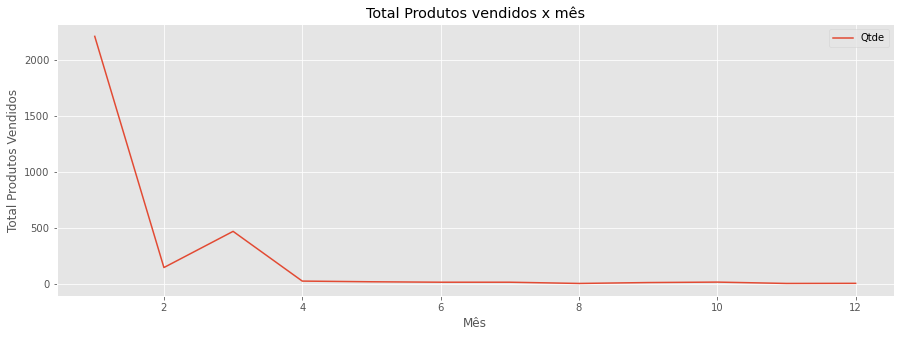

In [24]:
mov_por_cidade.groupby(mov_por_cidade["Mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês", figsize=(15,5))
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("Graficos/grafico_TOTALPROD_vs_MES.png")

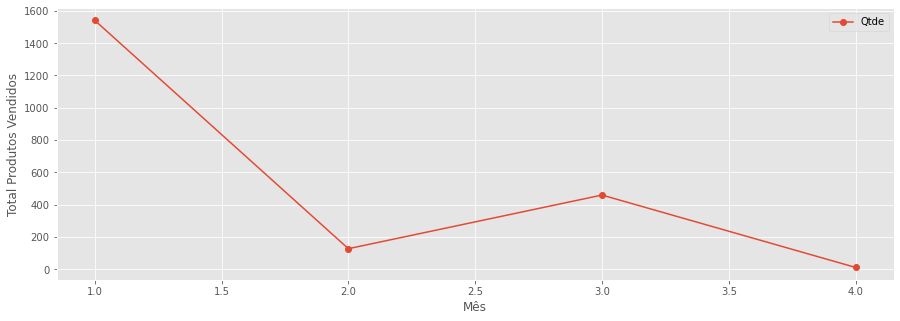

In [25]:
vd_2019 = mov_por_cidade[mov_por_cidade["Ano_venda"] == 2019]
vd_2019.groupby(vd_2019["Mes_venda"])["Qtde"].sum().plot(marker = "o", figsize=(15,5))
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

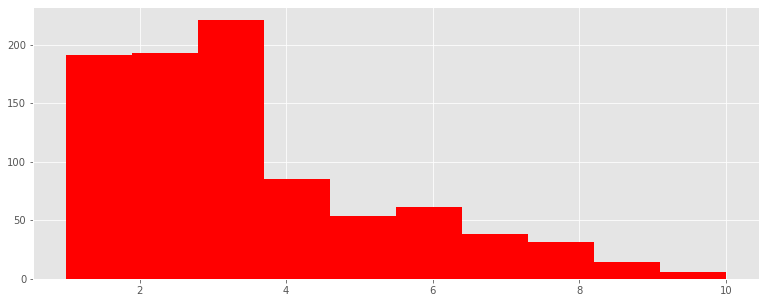

In [27]:
plt.figure(figsize=(13,5))
plt.hist(mov_por_cidade["Qtde"], color="red")

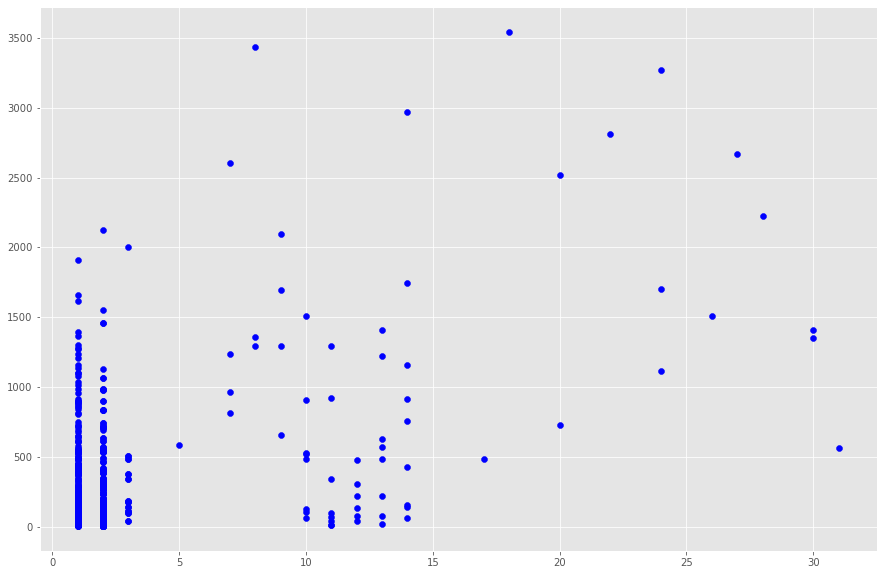

In [31]:
plt.figure(figsize=(15,10))
plt.scatter(x=vd_2019["Dia_venda"], y = vd_2019["Receita"], color = "blue")

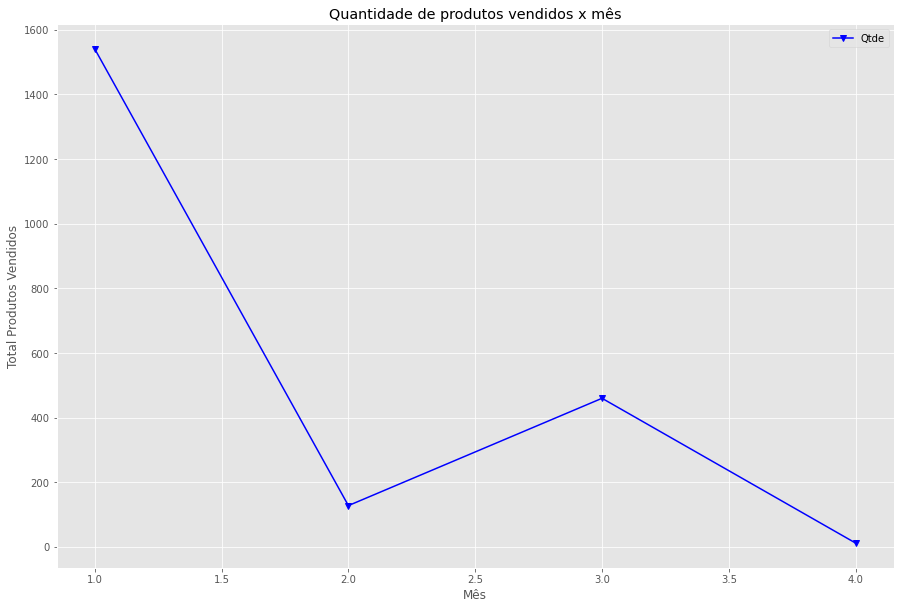

In [32]:
vd_2019.groupby(vd_2019["Mes_venda"])["Qtde"].sum().plot(marker = "v",figsize=(15,10), color = "blue")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("Graficos/grafico_QTDE_vs_MES.png")